In [2]:
!pip3 install fastai

    100% |████████████████████████████████| 235kB 4.9MB/s eta 0:00:01
    100% |████████████████████████████████| 10.1MB 141kB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 5.3MB/s ta 0:00:01
    100% |████████████████████████████████| 25.2MB 54kB/s  eta 0:00:011
    100% |████████████████████████████████| 102kB 13.9MB/s a 0:00:01
    100% |████████████████████████████████| 163kB 8.1MB/s eta 0:00:01
    100% |████████████████████████████████| 29.8MB 43kB/s  eta 0:00:01
    100% |████████████████████████████████| 512kB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 728kB/s eta 0:00:01
    100% |████████████████████████████████| 184kB 7.6MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 13.3MB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 472kB/s eta 0:00:011
  Running setup.py bdist_wheel for bottleneck ... done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c9

In [3]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [4]:
from PIL import Image

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
 help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [24]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [26]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [29]:
path_anno = path/'annotations'
path_img = path/'images'

In [30]:
fnames = get_image_files(path_img)
fnames[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_140.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_32.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_181.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_197.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_4.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_139.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_97.jpg')]

In [33]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
#pat = re.compile(r'/([^/]+)_\\d+.jpg$')

In [70]:
data = ImageDataBunch.from_name_re(path_img, 
                                   fnames, 
                                   pat, 
                                   valid_pct=.25,
                                   ds_tfms=get_transforms(
                                       flip_vert=True,
                                       max_rotate=45
                                   ), 
                                   size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5543 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,keeshond,saint_bernard,leonberger,Ragdoll
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1847 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Russian_Blue,pug,Russian_Blue,Abyssinian,newfoundland
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

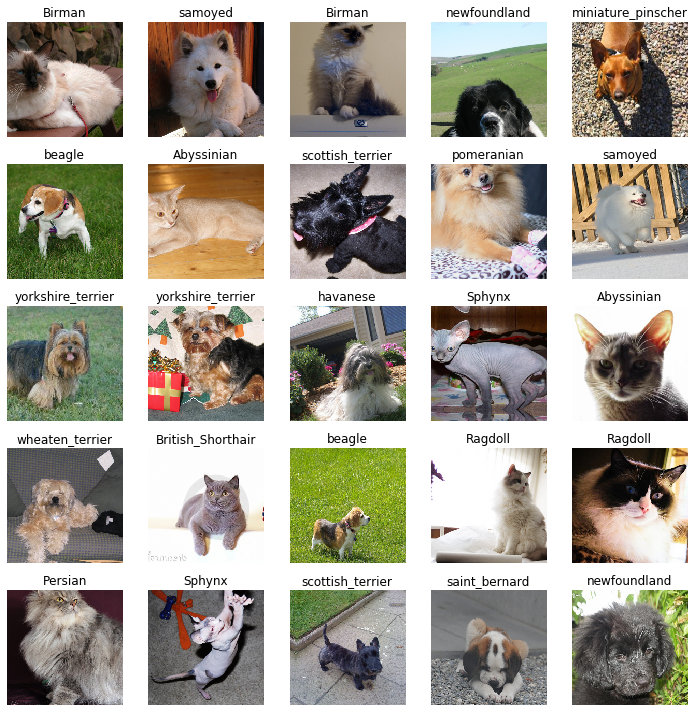

In [42]:
data.show_batch(rows=5, figsize=(10,10))

In [43]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training: resnet34

In [77]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 45017364.12it/s]


In [78]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.896712,0.428937,0.114239,0.885761,00:40
1,0.982593,0.300062,0.094748,0.905252,00:39
2,0.729756,0.274874,0.094207,0.905793,00:39
3,0.606832,0.242500,0.081213,0.918787,00:39
4,0.509941,0.225728,0.072550,0.927450,00:39
5,0.426107,0.211417,0.070384,0.929616,00:39
6,0.373102,0.201465,0.067136,0.932864,00:40
7,0.327349,0.186532,0.059556,0.940444,00:39
8,0.298294,0.180625,0.055766,0.944234,00:39
9,0.269729,0.177351,0.055766,0.944234,00:39



# Fine-tuning

In [79]:
learn.unfreeze()

In [80]:
learn.lr_find(start_lr=1e-10)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


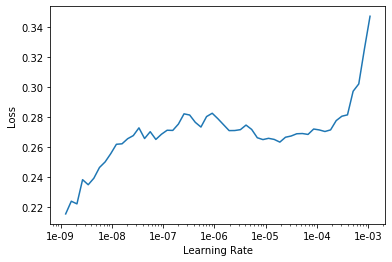

In [81]:
learn.recorder.plot()

In [82]:
learn.fit_one_cycle(5, max_lr=slice(1e-9, 1e-7))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.258436,0.176565,0.055225,0.944775,00:40
1,0.270465,0.177938,0.058473,0.941527,00:40
2,0.249469,0.176452,0.053059,0.946941,00:40
3,0.259253,0.177167,0.055766,0.944234,00:40
4,0.269295,0.176225,0.055766,0.944234,00:40


In [83]:
learn.lr_find(start_lr=1e-10)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


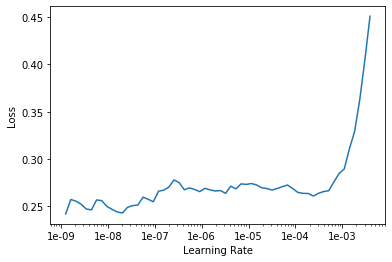

In [84]:
learn.recorder.plot()

In [85]:
learn.fit_one_cycle(5, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.691043,3.345424,0.691391,0.308609,00:40
1,2.074848,14.914338,0.850568,0.149432,00:41
2,1.627620,1.306867,0.413644,0.586356,00:41
3,1.095460,0.731906,0.236058,0.763942,00:40
4,0.772509,0.569897,0.183541,0.816459,00:40
